In [ ]:
import os
import json
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter, MaxNLocator, MultipleLocator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set the new working directory
new_dir = "/content/drive/MyDrive/DIPLOMSKI_LD/DIPLOMSKI_LD/chest_xray/train/test_data"
os.chdir(new_dir)

# Confirm the current working directory
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/MyDrive/DIPLOMSKI_LD/DIPLOMSKI_LD/chest_xray/train/test_data


In [ ]:
all_results = {}
fname = "model_results.json"
with open(fname,'r') as file:
    try:
        all_results = json.load(file)
    except json.JSONDecodeError as e:
        all_results = {}

df = pd.DataFrame(all_results).T
# df
df = pd.concat([df.drop(['test_scores'], axis=1), pd.json_normalize(df['test_scores']).set_index(df.index)], axis=1)
if 'gen_label' in df.columns:
    df['gen_augment'] = df.gen_label.str.contains('dcgan')
else:
    df['gen_augment'] = False

df.tail()

,n_train,n_test,n_val,n_normal,n_pneumo,train_scores,val_scores,gen_label,n_generated,history,Accuracy,Precision,Recall,F1 Score,TP,TN,FP,FN,gen_augment
2025-09-02 20:17:55.556221,1900,500,100,500,500,"{'Accuracy': 0.9221398305084746, 'Precision': ...","{'Accuracy': 0.9166666666666666, 'Precision': ...",1000 train images + 1000 dcgan images,1000,"{'loss': [0.4327596127986908, 0.22618660330772...",0.939516,0.943089,0.935484,0.939271,232,234,14,16,True
2025-09-02 20:19:06.547599,900,500,100,500,500,"{'Accuracy': 0.9520089285714286, 'Precision': ...","{'Accuracy': 0.9166666666666666, 'Precision': ...","No gen, just 1000 train images",0,"{'loss': [0.521922767162323, 0.463976174592971...",0.957661,0.970954,0.943548,0.957055,234,241,7,14,False
2025-09-02 20:21:23.966819,1900,500,100,500,500,"{'Accuracy': 0.9645127118644068, 'Precision': ...","{'Accuracy': 0.9166666666666666, 'Precision': ...",1000 train images + 1000 dcgan images,1000,"{'loss': [0.4065287709236145, 0.20820224285125...",0.949597,0.937008,0.963563,0.950100,238,233,16,9,True
2025-09-02 20:22:35.990001,900,500,100,500,500,"{'Accuracy': 0.9486607142857143, 'Precision': ...","{'Accuracy': 0.9166666666666666, 'Precision': ...","No gen, just 1000 train images",0,"{'loss': [0.49311181902885437, 0.0873421877622...",0.969758,0.983471,0.955823,0.969450,238,243,4,11,False
2025-09-02 20:24:53.744955,1900,500,100,500,500,"{'Accuracy': 0.9560381355932204, 'Precision': ...","{'Accuracy': 0.8541666666666666, 'Precision': ...",1000 train images + 1000 dcgan images,1000,"{'loss': [0.4392600655555725, 0.19446519017219...",0.909274,0.990291,0.825911,0.900662,204,247,2,43,True


In [ ]:
print(df.iloc[0])


n_train                                                        90
n_test                                                        500
n_val                                                          10
n_normal                                                       50
n_pneumo                                                       50
train_scores    {'Accuracy': 0.5, 'Precision': 0.5, 'Recall': ...
val_scores      {'Accuracy': 0.5, 'Precision': 0.5, 'Recall': ...
gen_label                           No gen, just 100 train images
n_generated                                                     0
history         {'loss': [1.533384919166565, 0.330260545015335...
Accuracy                                                    0.512
Precision                                                0.506073
Recall                                                        1.0
F1 Score                                                 0.672043
TP                                                            250
TN        

In [ ]:
df.history[0]

/tmp/ipython-input-1962789648.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.history[0]


{'loss': [1.533384919166565,
  0.3302605450153351,
  0.4933820962905884,
  0.3644554018974304,
  0.569006621837616,
  0.31297796964645386,
  0.4253377616405487,
  0.24585863947868347,
  0.3040846586227417,
  0.2579880356788635,
  0.1873735785484314,
  0.23762090504169464,
  0.2321493774652481,
  0.1563204973936081,
  0.18341997265815735,
  0.2320765107870102,
  0.2514159381389618,
  0.2095288783311844,
  0.2547939717769623,
  0.12742790579795837],
 'val_loss': [0.6603552103042603,
  0.6569761037826538,
  0.6480319499969482,
  0.735047459602356,
  0.7128764986991882,
  0.6958588361740112,
  0.7104819416999817,
  0.8648061752319336,
  0.8275877237319946,
  0.8874948620796204,
  1.0832245349884033,
  0.9560464024543762,
  0.7699394226074219,
  0.9515282511711121,
  1.1800850629806519,
  0.887524425983429,
  0.7337328791618347,
  0.7842870354652405,
  0.7779291868209839,
  1.0031968355178833],
 'accuracy': [0.7111111283302307,
  0.8999999761581421,
  0.800000011920929,
  0.8777777552604675

In [ ]:
df.shape

(910, 19)

In [ ]:
df.columns

Index(['n_train', 'n_test', 'n_val', 'n_normal', 'n_pneumo', 'train_scores',
       'val_scores', 'gen_label', 'n_generated', 'history', 'Accuracy',
       'Precision', 'Recall', 'F1 Score', 'TP', 'TN', 'FP', 'FN',
       'gen_augment'],
      dtype='object')

In [ ]:
if 'gen_label' in df.columns:
    df['gen_augment'] = df.gen_label.str.contains('dcgan')
else:
    df['gen_augment'] = False

In [ ]:
original_only = df[df['gen_augment'] == False]
gan_augmented = df[df['gen_augment'] == True]

In [ ]:
print(f"Total experiments: {len(df)}")
print(f"Original only experiments: {len(original_only)}")
print(f"GAN-augmented experiments: {len(gan_augmented)}")

Total experiments: 910
Original only experiments: 455
GAN-augmented experiments: 455


In [ ]:
df['original_train'] = pd.to_numeric(
    df.gen_label.str.extract(r'(\d+) train')[0],
    errors='coerce'
)

df['n_augment'] = pd.to_numeric(
    df.gen_label.str.extract(r'(\d+) dcgan images')[0],
    errors='coerce'
).astype('Int64')

###

In [ ]:
original_only_test_expanded = original_only['test_scores'].apply(pd.Series)
gan_augmented_test_expanded = gan_augmented['test_scores'].apply(pd.Series)

print("\nAverage performance metrics (original only):")
print(original_only_test_expanded[['Accuracy', 'F1 Score', 'Precision', 'Recall']].mean())

print("\nAverage performance metrics (GAN augmented):")
print(gan_augmented_test_expanded[['Accuracy', 'F1 Score', 'Precision', 'Recall']].mean())


Average performance metrics (original only):
Accuracy     0.786482
F1 Score     0.842898
Precision    0.781822
Recall       0.964379
dtype: float64

Average performance metrics (GAN augmented):
Accuracy     0.872896
F1 Score     0.885426
Precision    0.891963
Recall       0.907567
dtype: float64


###

In [ ]:
print("\nAverage performance metrics (original only):")
print(original_only[['Accuracy', 'F1 Score', 'Precision', 'Recall']].mean())

print("\nAverage performance metrics (GAN augmented):")
print(gan_augmented[['Accuracy', 'F1 Score', 'Precision', 'Recall']].mean())


Average performance metrics (original only):
Accuracy     0.786482
F1 Score     0.842898
Precision    0.781822
Recall       0.964379
dtype: float64

Average performance metrics (GAN augmented):
Accuracy     0.872896
F1 Score     0.885426
Precision    0.891963
Recall       0.907567
dtype: float64


### 1 ✅

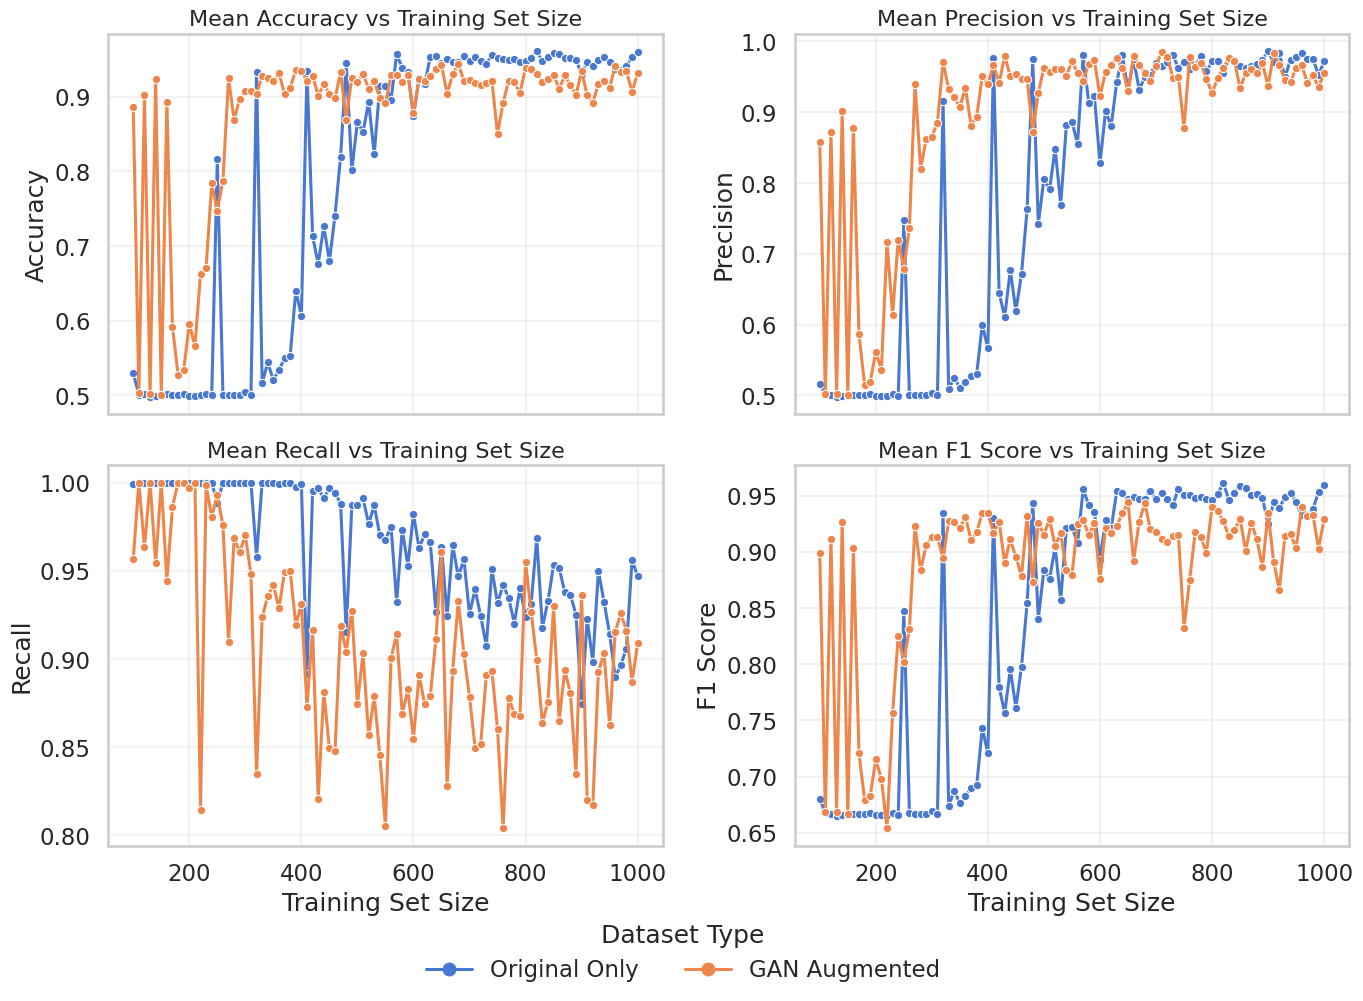

In [ ]:
# Averages
avg_metrics = (
    df.groupby(['original_train','gen_augment'])[['Accuracy','Precision','Recall','F1 Score']]
      .mean().reset_index()
)
avg_metrics["gen_augment"] = avg_metrics["gen_augment"].map({
    True:"GAN Augmented", False:"Original Only",
    "True":"GAN Augmented", "False":"Original Only"
})

metrics = ["Accuracy","Precision","Recall","F1 Score"]

# Muted colors
muted = sns.color_palette("muted", 10)
palette = {
    "Original Only": muted[0],   # muted blue
    "GAN Augmented": muted[1],   # muted orange
}

sns.set(style="whitegrid", context="talk")
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    sns.lineplot(
        data=avg_metrics,
        x="original_train",
        y=metric,
        hue="gen_augment",
        palette=palette,
        marker="o",
        linewidth=2.2,
        markersize=6,
        ax=ax,
        legend=False
    )
    ax.set_title(f"Mean {metric} vs Training Set Size", fontsize=16)
    ax.set_xlabel("Training Set Size")
    ax.set_ylabel(metric)
    ax.grid(True, alpha=0.25)

# Shared legend (muted colors)
handles = [
    Line2D([0],[0], color=palette["Original Only"],  marker="o", linewidth=2.2, label="Original Only"),
    Line2D([0],[0], color=palette["GAN Augmented"], marker="o", linewidth=2.2, label="GAN Augmented"),
]
fig.legend(handles=handles, title="Dataset Type", loc="lower center",
           ncol=2, frameon=False, bbox_to_anchor=(0.5, -0.02))

plt.tight_layout(rect=(0, 0.04, 1, 1))
plt.show()

### 2 ✅

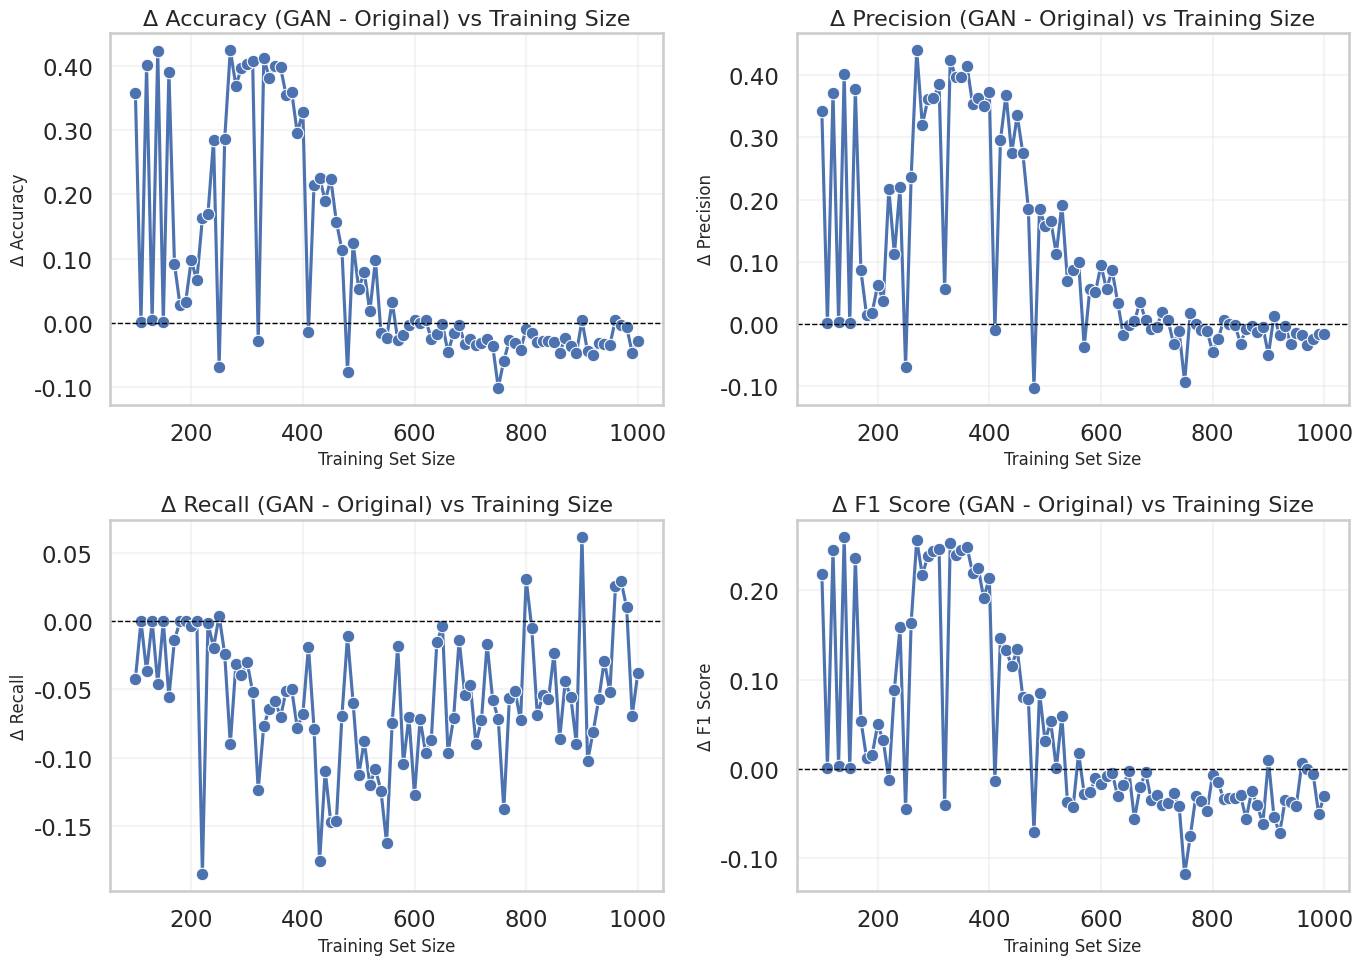

In [ ]:
# --------------------
# 2. Delta Performance (GAN Augmented - Original) in 2x2 Grid
# --------------------

# Compute averages grouped by train size and augmentation
avg_metrics = (
    df.groupby(['original_train', 'gen_augment'])[['Accuracy', 'Precision', 'Recall', 'F1 Score']]
    .mean()
    .reset_index()
)

# Pivot so that 'gen_augment' becomes columns
pivoted = avg_metrics.pivot(index='original_train', columns='gen_augment')

# Extract augmented and original metrics
aug = pivoted.xs(True, level='gen_augment', axis=1)
orig = pivoted.xs(False, level='gen_augment', axis=1)

# Compute delta
delta = aug - orig
delta['original_train'] = delta.index

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
titles = [f"Δ {m} (GAN - Original) vs Training Size" for m in metrics]

sns.set(style="whitegrid", context="talk")

# Create 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, metric, title in zip(axes, metrics, titles):
    sns.lineplot(
        data=delta,
        x="original_train",
        y=metric,
        marker="o",
        ax=ax
    )
    ax.axhline(0, color="black", linestyle="--", linewidth=1)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Training Set Size", fontsize=12)
    ax.set_ylabel(f"Δ {metric}", fontsize=12)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()


### 3 ✅

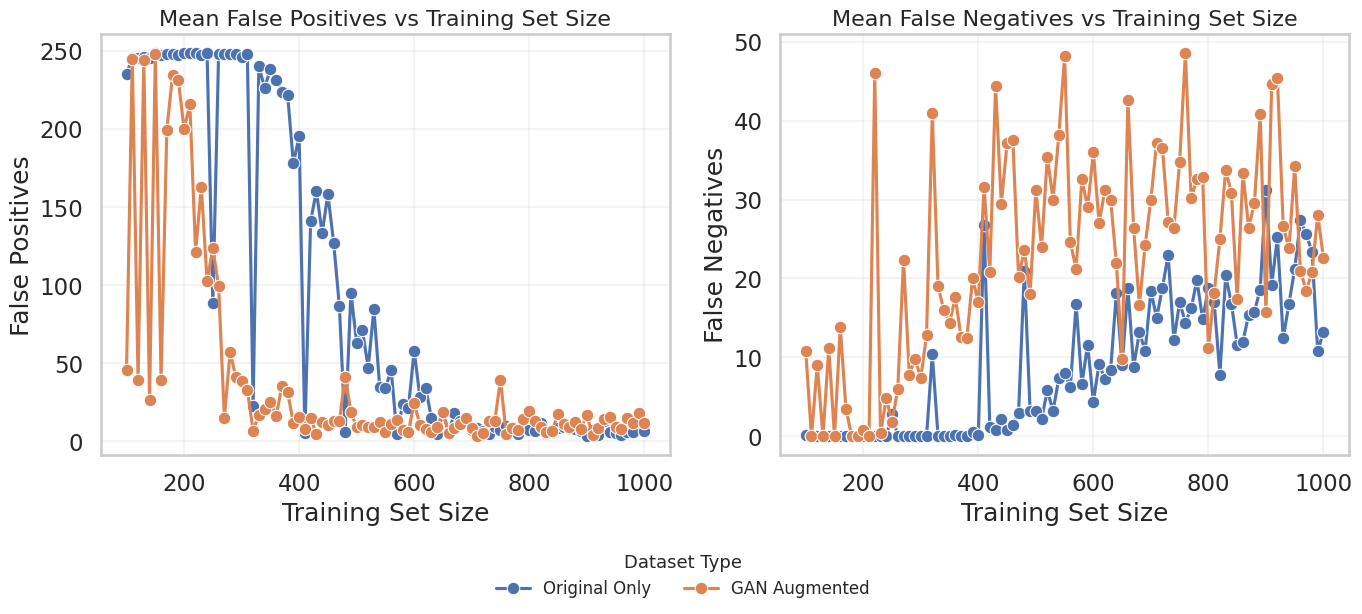

In [ ]:
# --------------------
# 3. False Positives & False Negatives (2x2 Grid) with a Single Legend (Like Your Picture)
# --------------------

# Compute averages of FP and FN grouped by training size and augmentation
fp_fn = (
    df.groupby(['original_train', 'gen_augment'])[['FP', 'FN']]
    .mean()
    .reset_index()
)

# Map augmentation labels
legend_map = {
    True: "GAN Augmented",
    False: "Original Only",
    "True": "GAN Augmented",
    "False": "Original Only"
}
fp_fn['gen_augment'] = fp_fn['gen_augment'].map(legend_map)

sns.set(style="whitegrid", context="talk")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# False Positives
sns.lineplot(
    data=fp_fn,
    x="original_train",
    y="FP",
    hue="gen_augment",
    marker="o",
    ax=axes[0]
)
axes[0].set_title("Mean False Positives vs Training Set Size", fontsize=16)
axes[0].set_xlabel("Training Set Size")
axes[0].set_ylabel("False Positives")
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
axes[0].grid(True, alpha=0.2)

# False Negatives
sns.lineplot(
    data=fp_fn,
    x="original_train",
    y="FN",
    hue="gen_augment",
    marker="o",
    ax=axes[1]
)
axes[1].set_title("Mean False Negatives vs Training Set Size", fontsize=16)
axes[1].set_xlabel("Training Set Size")
axes[1].set_ylabel("False Negatives")
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
axes[1].grid(True, alpha=0.2)

# Get legend handles/labels from one axis
handles, labels = axes[0].get_legend_handles_labels()

# Remove legends from individual plots
axes[0].get_legend().remove()
axes[1].get_legend().remove()

# Add a single legend centered below the plots
fig.legend(
    handles, labels,
    title="Dataset Type",
    loc='lower center',
    bbox_to_anchor=(0.5, -0.05),  # place below figure
    ncol=2,
    fontsize=12,
    title_fontsize=13,
    frameon=False  # remove legend box to match your picture
)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # leave space for legend
plt.show()


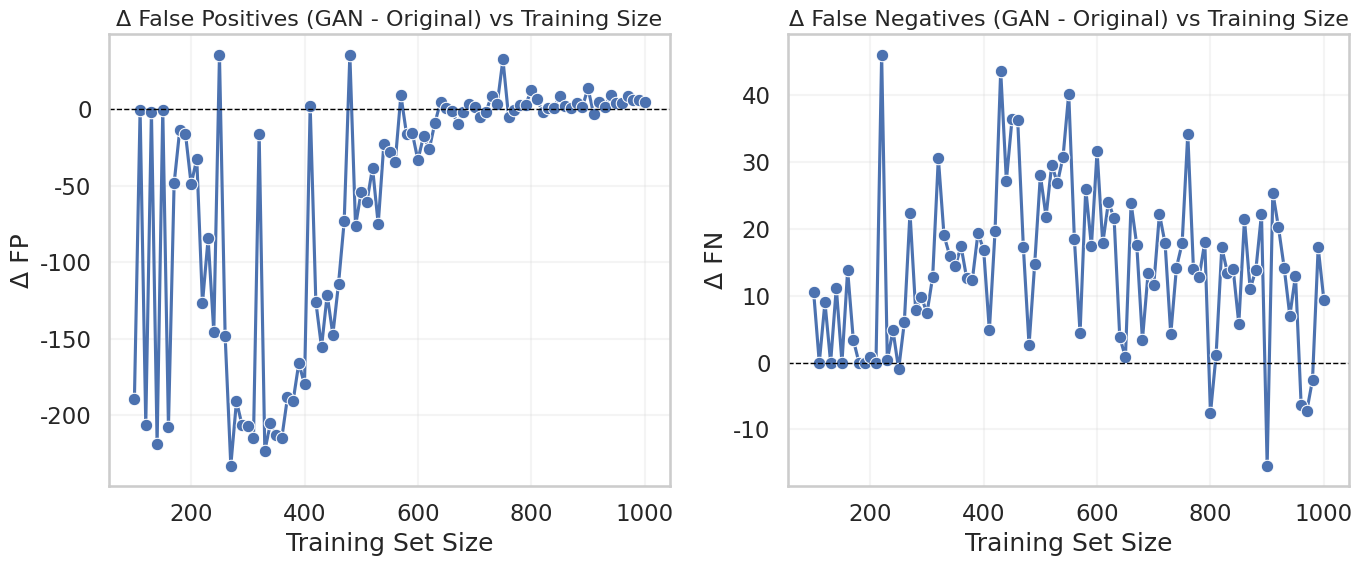

In [ ]:
# --------------------
# 4. Delta FP/FN (GAN Augmented - Original)
# --------------------

# Mean FP/FN by train size & augmentation
fp_fn_avg = (
    df.groupby(['original_train', 'gen_augment'])[['FP', 'FN']]
    .mean()
    .reset_index()
)

# Pivot to get columns for augmented/original
pivoted = fp_fn_avg.pivot(index='original_train', columns='gen_augment', values=['FP', 'FN'])

# In case gen_augment is strings instead of booleans, try both keys
def xs_safely(frame, key):
    try:
        return frame.xs(key, level='gen_augment', axis=1)
    except KeyError:
        return frame.xs(str(key), level='gen_augment', axis=1)

aug = xs_safely(pivoted, True)
orig = xs_safely(pivoted, False)

# Compute deltas
delta = aug - orig
delta['original_train'] = delta.index

sns.set(style="whitegrid", context="talk")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Δ False Positives
ax = sns.lineplot(
    data=delta,
    x='original_train',
    y=('FP'),
    marker='o',
    ax=axes[0]
)
axes[0].axhline(0, color='black', linestyle='--', linewidth=1)
axes[0].set_title("Δ False Positives (GAN - Original) vs Training Size", fontsize=16)
axes[0].set_xlabel("Training Set Size")
axes[0].set_ylabel("Δ FP")
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
axes[0].grid(True, alpha=0.2)

# Δ False Negatives
ax = sns.lineplot(
    data=delta,
    x='original_train',
    y=('FN'),
    marker='o',
    ax=axes[1]
)
axes[1].axhline(0, color='black', linestyle='--', linewidth=1)
axes[1].set_title("Δ False Negatives (GAN - Original) vs Training Size", fontsize=16)
axes[1].set_xlabel("Training Set Size")
axes[1].set_ylabel("Δ FN")
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
axes[1].grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

### 4 ✅

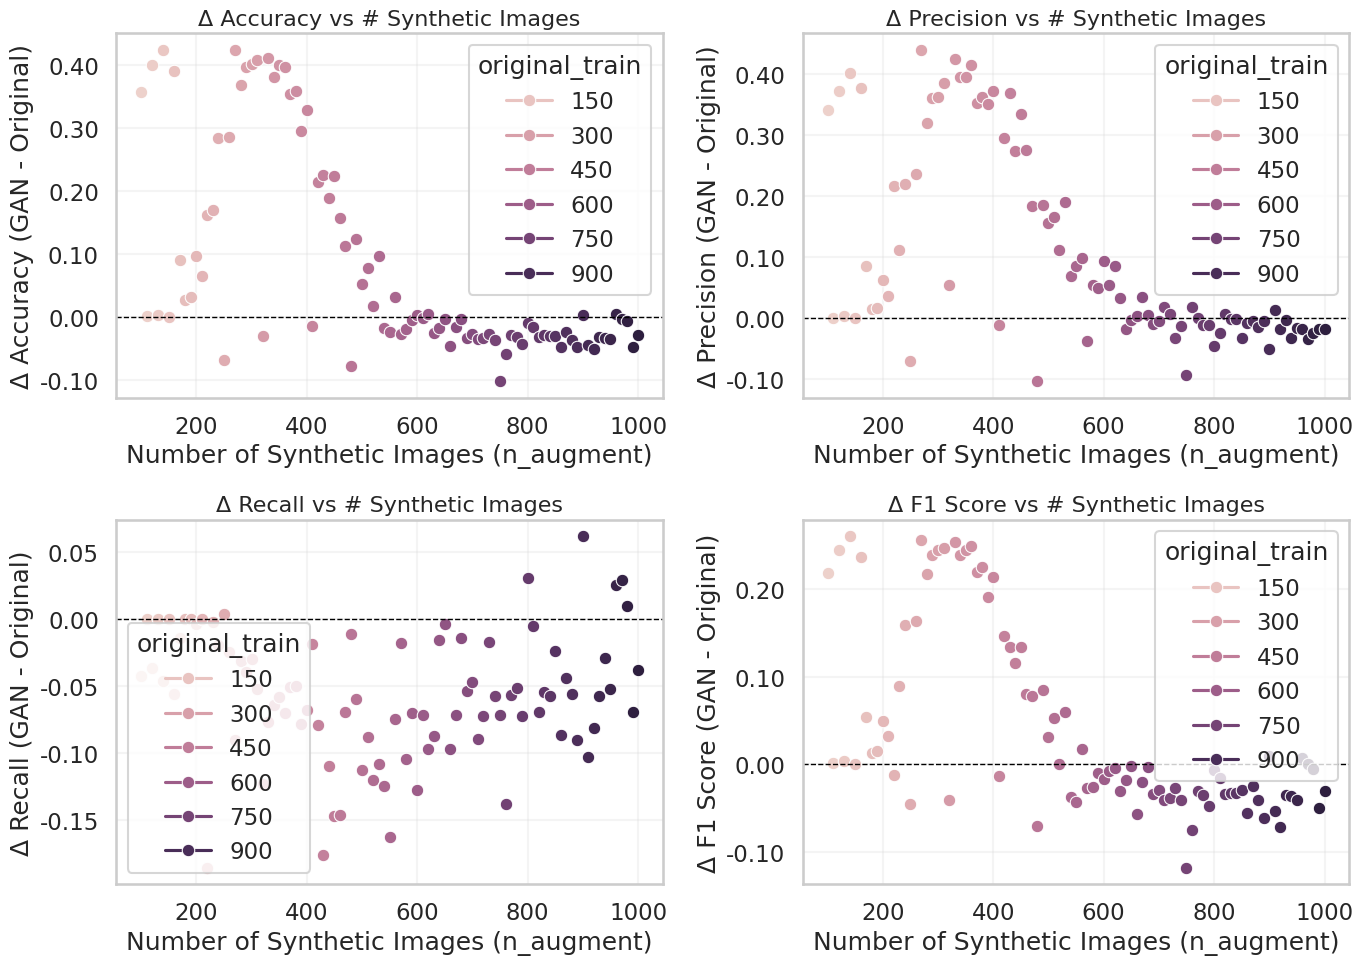

In [ ]:
# --------------------
# 5. GAN Effect vs Number of Synthetic Images (2x2 Grid)
# --------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# If metrics aren't columns yet, pull them from test_scores
METRICS = ["Accuracy", "Precision", "Recall", "F1 Score"]
if not set(METRICS).issubset(df.columns) and "test_scores" in df.columns:
    df = df.join(pd.json_normalize(df["test_scores"])[METRICS])

# Baseline: Original-only performance per training size
baseline = (
    df.loc[df["gen_augment"] == False]
      .groupby("original_train")[METRICS]
      .mean()
      .add_prefix("base_")
      .reset_index()
)

# Augmented performance per training size & number of synthetic images
aug_means = (
    df.loc[df["gen_augment"] == True]
      .dropna(subset=["n_augment"])
      .groupby(["original_train", "n_augment"])[METRICS]
      .mean()
      .reset_index()
)

# Merge to compute deltas (GAN - Original)
delta = aug_means.merge(baseline, on="original_train", how="left")
for m in METRICS:
    delta[f"Δ_{m}"] = delta[m] - delta[f"base_{m}"]

# Plot: 2x2 grid, one subplot per metric
sns.set(style="whitegrid", context="talk")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Ensure nice ordering
delta = delta.sort_values(["original_train", "n_augment"])
hue_order = sorted(delta["original_train"].unique())

titles = [f"Δ {m} vs # Synthetic Images" for m in METRICS]
for ax, m, title in zip(axes, METRICS, titles):
    sns.lineplot(
        data=delta,
        x="n_augment",
        y=f"Δ_{m}",
        hue="original_train",
        hue_order=hue_order,
        marker="o",
        ax=ax
    )
    ax.axhline(0, color="black", linestyle="--", linewidth=1)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Number of Synthetic Images (n_augment)")
    ax.set_ylabel(f"Δ {m} (GAN - Original)")
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()


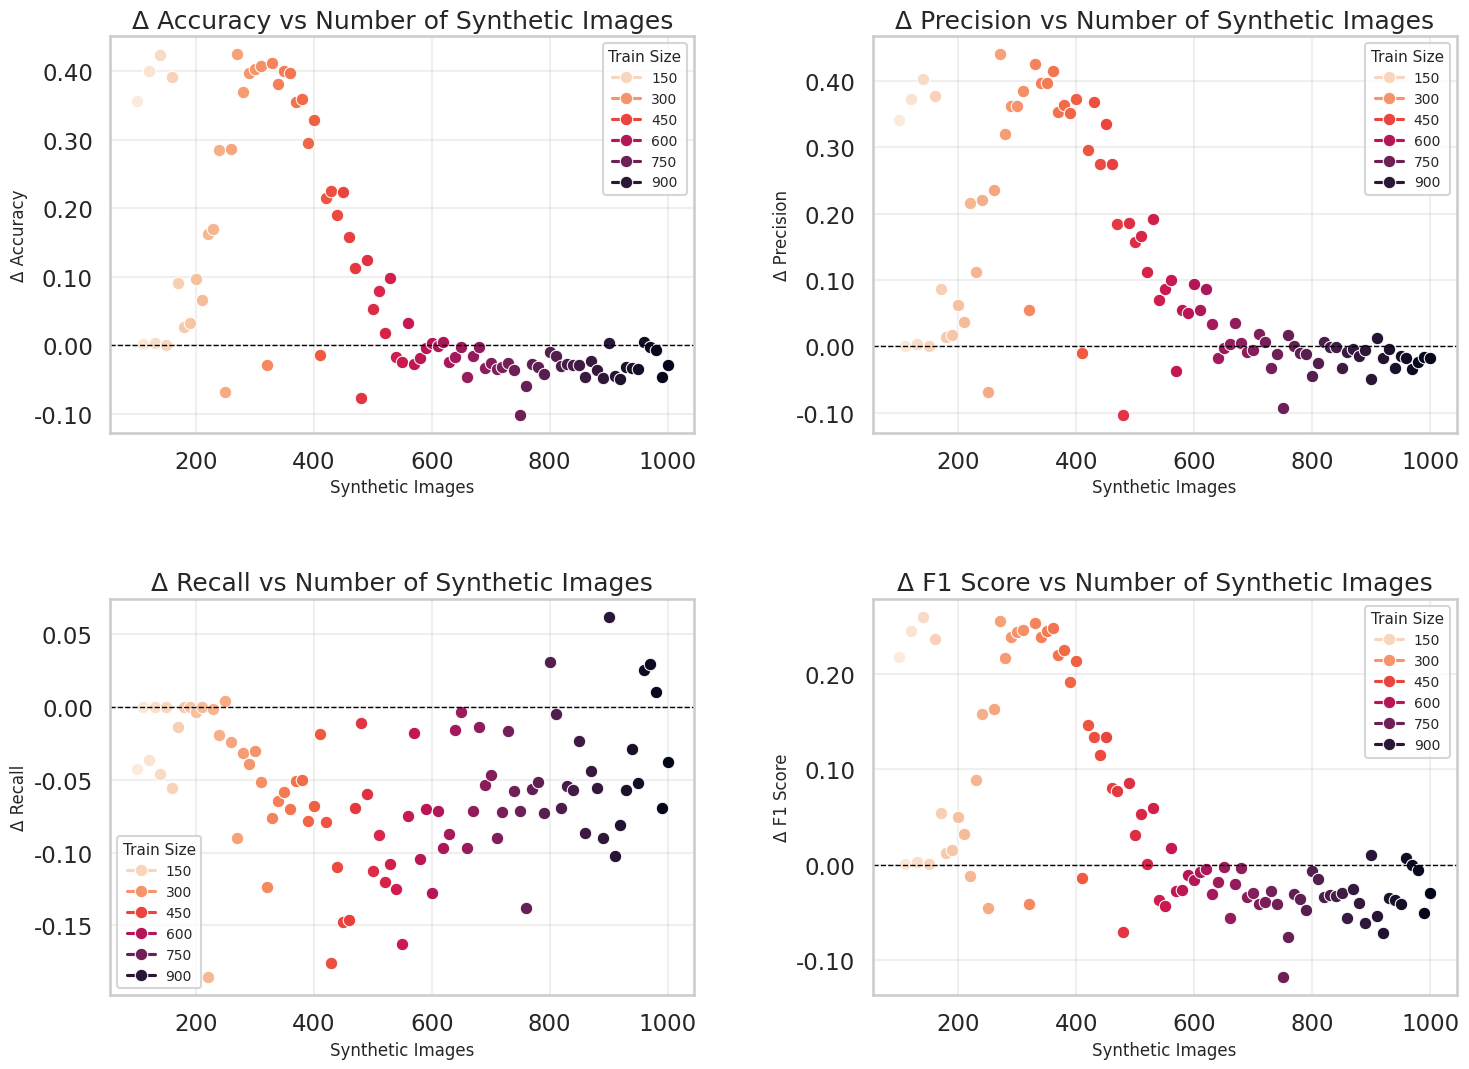

In [ ]:
# --------------------
# GAN Effect vs Number of Synthetic Images (Clean 2x2 Grid)
# --------------------

METRICS = ["Accuracy", "Precision", "Recall", "F1 Score"]
titles = [f"Δ {m} vs Number of Synthetic Images" for m in METRICS]

sns.set(style="whitegrid", context="talk")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Larger canvas
axes = axes.flatten()

for ax, m, title in zip(axes, METRICS, titles):
    sns.lineplot(
        data=delta,
        x="n_augment",
        y=f"Δ_{m}",
        hue="original_train",
        hue_order=hue_order,
        marker="o",
        ax=ax,
        palette="rocket_r"  # Clean, soft color palette
    )
    ax.axhline(0, color="black", linestyle="--", linewidth=1)
    ax.set_title(title, fontsize=18)
    ax.set_xlabel("Synthetic Images", fontsize=12)
    ax.set_ylabel(f"Δ {m}", fontsize=12)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.grid(True, alpha=0.3)
    ax.legend(title="Train Size", fontsize=10, title_fontsize=11)

plt.tight_layout(pad=3.0)
plt.show()


### 5

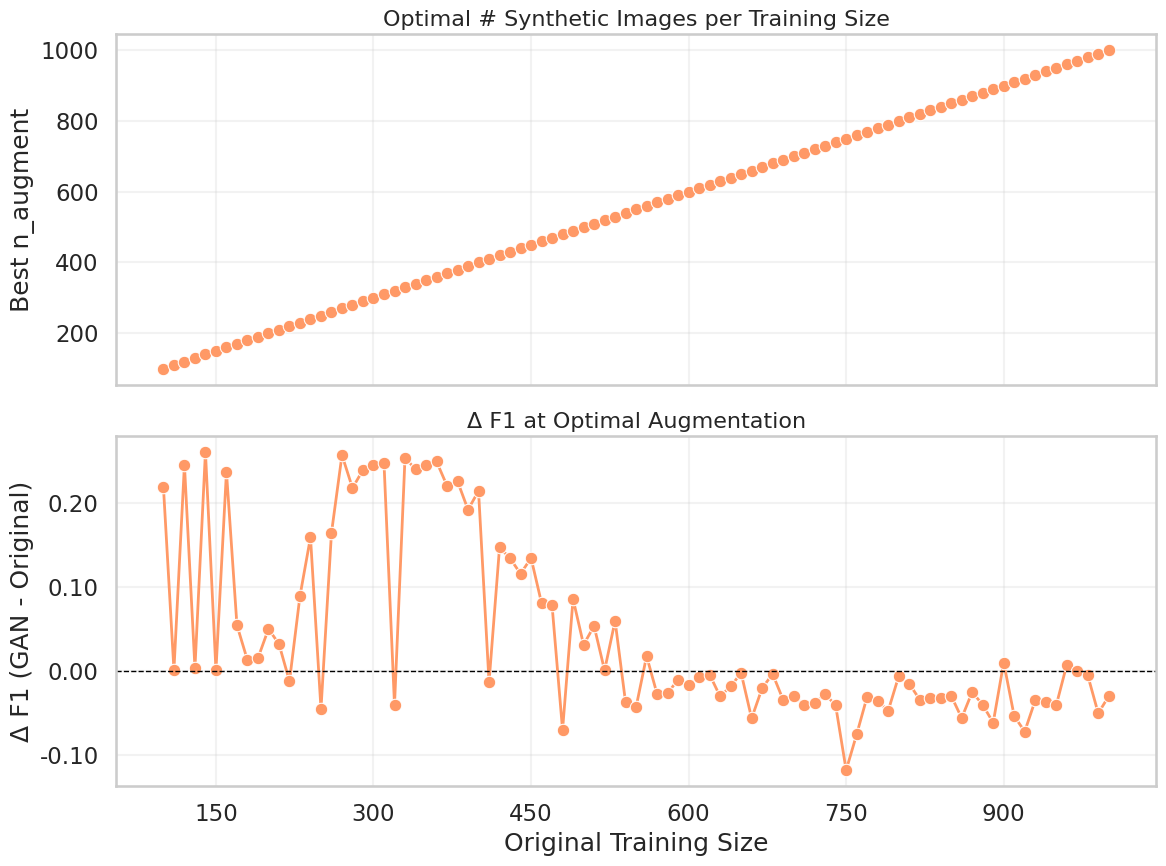

In [ ]:
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

plot_df = opt.sort_values("original_train")
sns.set(style="whitegrid", context="talk")

fig, axes = plt.subplots(2, 1, figsize=(12, 9), sharex=True)

# 1) Best n_augment vs original_train
sns.lineplot(data=plot_df, x="original_train", y="best_n_augment",
             marker="o", linewidth=2, color="#ff9966", ax=axes[0])
axes[0].set_title("Optimal # Synthetic Images per Training Size", fontsize=16)
axes[0].set_ylabel("Best n_augment")
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  # <-- fixed

# 2) ΔF1 at that optimum vs original_train
sns.lineplot(data=plot_df, x="original_train", y="Δ_best_F1",
             marker="o", linewidth=2, color="#ff9966", ax=axes[1])
axes[1].axhline(0, color="black", linestyle="--", linewidth=1)
axes[1].set_title("Δ F1 at Optimal Augmentation", fontsize=16)
axes[1].set_ylabel("Δ F1 (GAN - Original)")
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # <-- fixed

# Sparse integer x-ticks + light grids
for ax in axes:
    ax.xaxis.set_major_locator(MaxNLocator(nbins=8, integer=True))
    ax.grid(True, alpha=0.25)

axes[1].set_xlabel("Original Training Size")
plt.tight_layout()
plt.show()

### 6

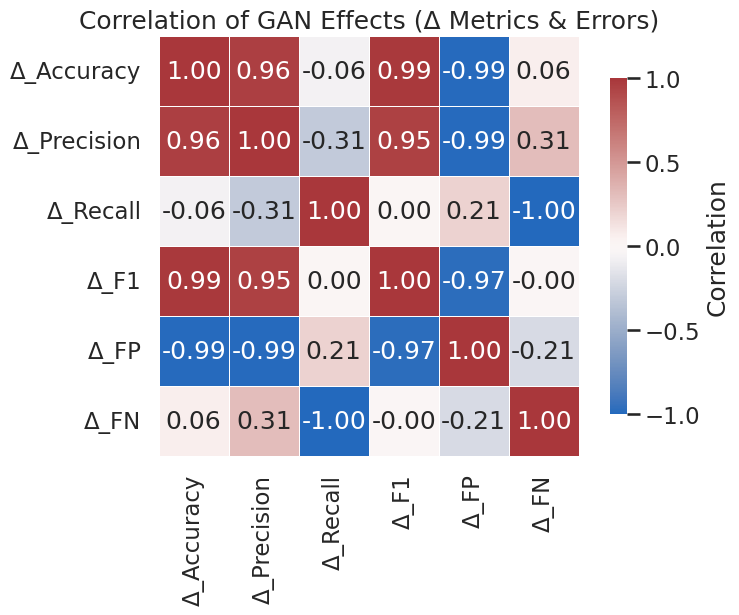

In [ ]:
# --------------------
# Correlation of GAN Effects (Δ metrics & errors) — fixed
# --------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

METRICS_RAW = ["Accuracy", "Precision", "Recall", "F1 Score"]
COUNTS = ["FP", "FN"]
name_map = {"F1 Score": "F1"}  # short, space-free names

# Ensure fields exist (expand from test_scores if needed)
need = set(METRICS_RAW + COUNTS) - set(df.columns)
if need and "test_scores" in df.columns:
    df = df.join(pd.json_normalize(df["test_scores"])[list(need)])

# Baseline (original only) per training size
base = (
    df.loc[df["gen_augment"] == False]
      .groupby("original_train")[METRICS_RAW + COUNTS]
      .mean()
      .add_prefix("base_")
      .reset_index()
)

# Augmented means per (training size, n_augment)
aug = (
    df.loc[df["gen_augment"] == True]
      .dropna(subset=["n_augment"])
      .groupby(["original_train", "n_augment"])[METRICS_RAW + COUNTS]
      .mean()
      .reset_index()
)

# Merge & compute deltas with normalized names
delta = aug.merge(base, on="original_train", how="left")
for m in METRICS_RAW:
    short = name_map.get(m, m)
    delta[f"Δ_{short}"] = delta[m] - delta[f"base_{m}"]
for c in COUNTS:
    delta[f"Δ_{c}"] = delta[c] - delta[f"base_{c}"]

# Correlation
cols = [f"Δ_{name_map.get(m, m)}" for m in METRICS_RAW] + ["Δ_FP", "Δ_FN"]
corr = delta[cols].corr(method="pearson")

# Heatmap
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(8.5, 6.5))
ax = sns.heatmap(
    corr, vmin=-1, vmax=1, center=0, cmap="vlag",
    annot=True, fmt=".2f", linewidths=.5, square=True,
    cbar_kws={"shrink": .8, "label": "Correlation"}
)
ax.set_title("Correlation of GAN Effects (Δ Metrics & Errors)")
plt.tight_layout()
plt.show()


### 7

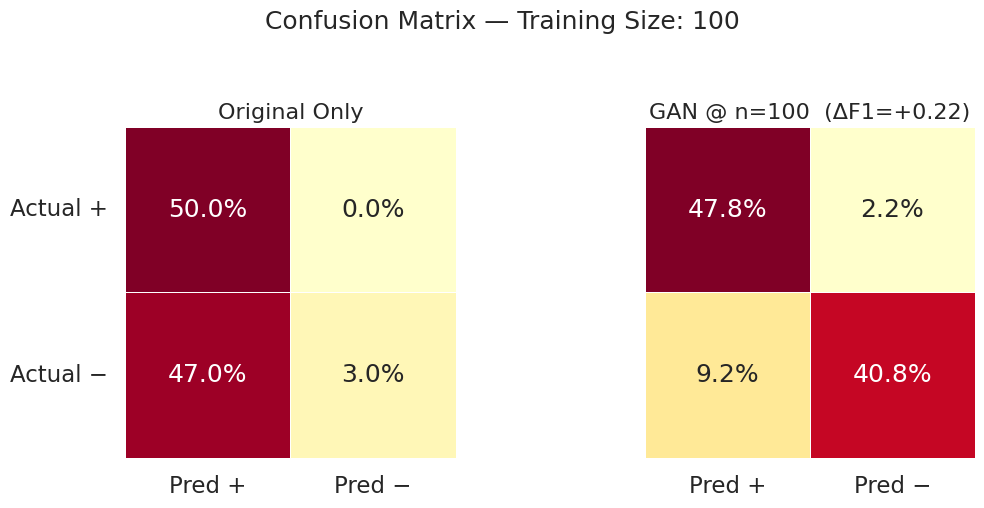

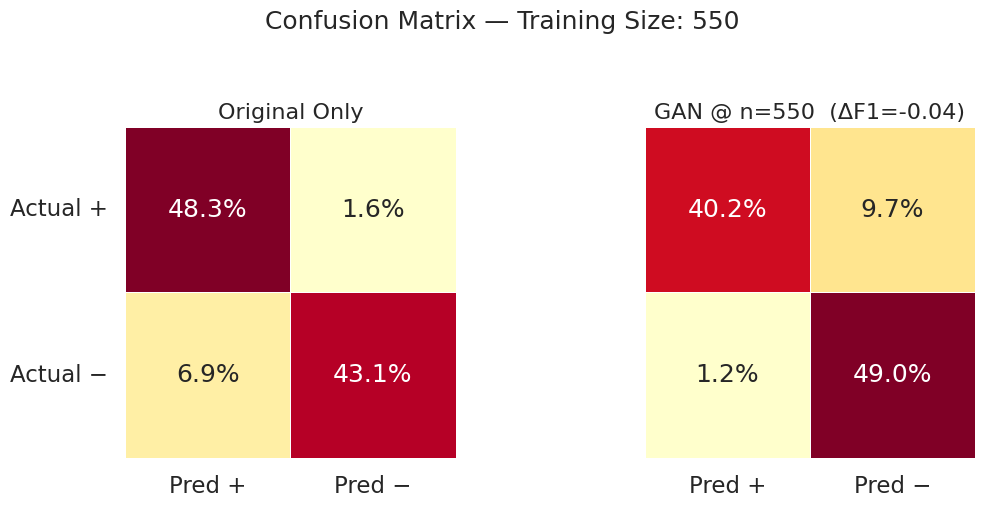

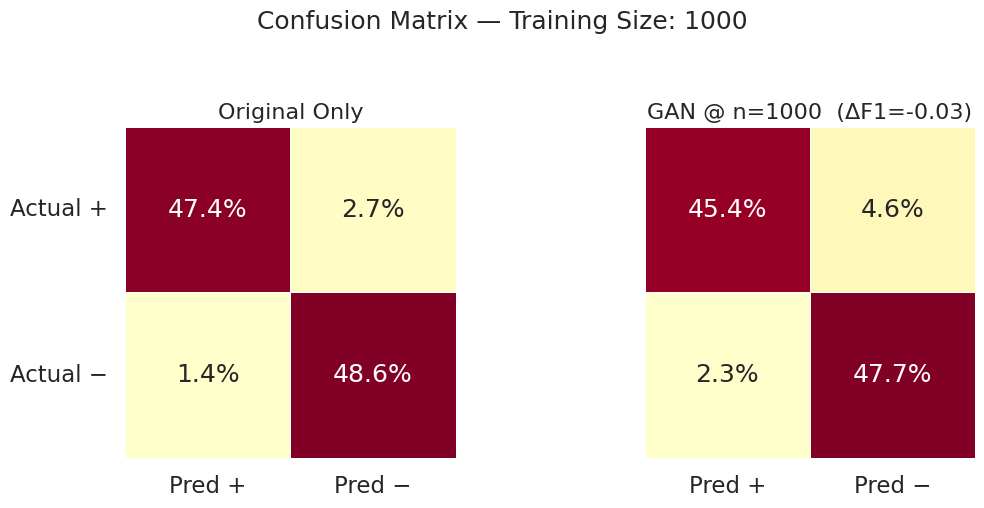

In [ ]:
# --------------------
# Confusion matrices: Original vs GAN @ optimal n_augment
# --------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure we have counts + F1
need = {"TP","TN","FP","FN","F1 Score"} - set(df.columns)
if need and "test_scores" in df.columns:
    df = df.join(pd.json_normalize(df["test_scores"])[list(need)])

# ----- pick representative training sizes (min/median/max) -----
sizes = np.sort(df["original_train"].dropna().unique())
if len(sizes) >= 3:
    reps = [sizes[0], sizes[len(sizes)//2], sizes[-1]]
else:
    reps = list(sizes)  # if fewer are available

# ----- helper: mean confusion for a subset -----
def mean_confusion(sub):
    vals = sub[["TP","FP","FN","TN"]].mean()
    tp, fp, fn, tn = vals["TP"], vals["FP"], vals["FN"], vals["TN"]
    total = tp + fp + fn + tn
    if total == 0: total = 1.0
    # rows: actual (+, -), cols: pred (+, -)
    mat = np.array([[tp, fn],
                    [fp, tn]], dtype=float) / total
    return mat

# ----- compute baseline (original) and optimal GAN per training size -----
plots_data = []  # list of (size, baseline_mat, gan_mat, best_n, delta_f1)

for s in reps:
    base_sub = df[(df["original_train"] == s) & (df["gen_augment"] == False)]
    if base_sub.empty:
        continue
    base_mat = mean_confusion(base_sub)
    base_f1  = base_sub["F1 Score"].mean()

    # among augmented rows of this size, choose n_augment that maximizes F1 (tie -> smaller n)
    aug_sub = df[(df["original_train"] == s) & (df["gen_augment"] == True) & df["n_augment"].notna()]
    if aug_sub.empty:
        continue
    f1_by_n = (aug_sub.groupby("n_augment")["F1 Score"].mean().sort_values(ascending=False))
    best_n  = f1_by_n.index.min()  # default in case of tie after sort
    # re-pick explicitly: highest F1, then smallest n
    best_f1 = f1_by_n.iloc[0]
    best_n  = f1_by_n[f1_by_n == best_f1].index.min()

    gan_sub = aug_sub[aug_sub["n_augment"] == best_n]
    gan_mat = mean_confusion(gan_sub)
    gan_f1  = gan_sub["F1 Score"].mean()

    plots_data.append((s, base_mat, gan_mat, int(best_n), float(gan_f1 - base_f1)))

# ----- plot: one figure per training size, side-by-side heatmaps -----
sns.set(style="whitegrid", context="talk")
for s, base_mat, gan_mat, best_n, d_f1 in plots_data:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

    for ax, mat, title in [
        (axes[0], base_mat, "Original Only"),
        (axes[1], gan_mat,  f"GAN @ n={best_n}  (ΔF1={d_f1:+.2f})")
    ]:
        sns.heatmap(
            mat, annot=True, fmt=".1%", cmap="YlOrRd",
            cbar=False, linewidths=.5, linecolor='white', square=True, ax=ax
        )
        ax.set_title(title, fontsize=16)
        ax.set_xticklabels(["Pred +", "Pred −"], rotation=0)
        ax.set_yticklabels(["Actual +", "Actual −"], rotation=0)

    fig.suptitle(f"Confusion Matrix — Training Size: {s}", fontsize=18, y=1.03)
    plt.tight_layout()
    plt.show()


### 8 ✅

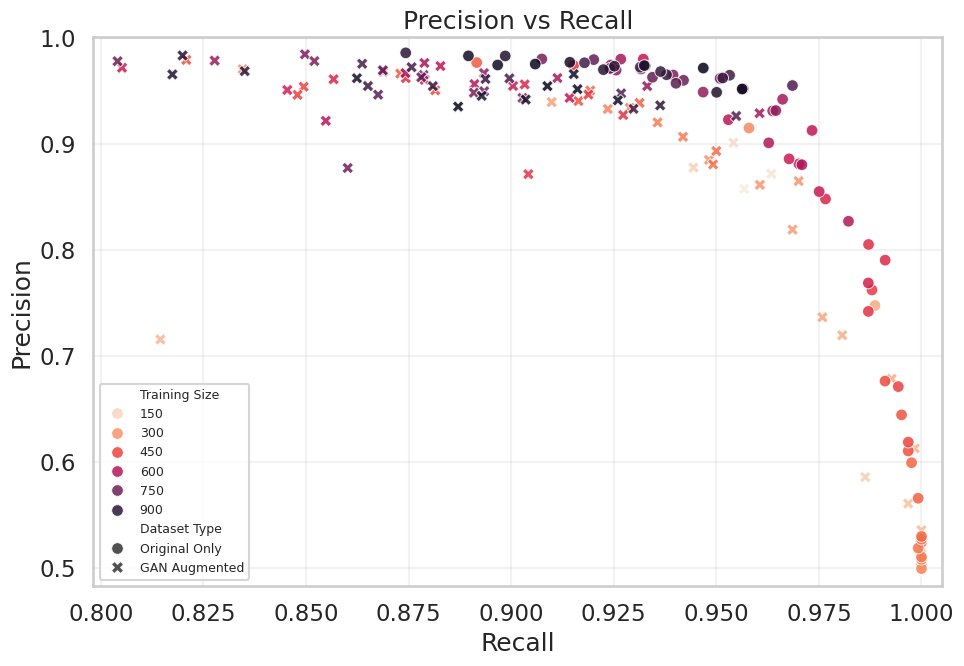

In [ ]:
# ensure Precision/Recall exist
if not {"Precision","Recall"}.issubset(df.columns) and "test_scores" in df.columns:
    df = df.join(pd.json_normalize(df["test_scores"])[["Precision","Recall"]])

# prep
df_pr = df.copy()
df_pr["aug_label"] = df_pr["gen_augment"].map({
    True: "GAN Augmented", False: "Original Only",
    "True": "GAN Augmented", "False": "Original Only"
})
df_pr["n_augment_filled"] = df_pr["n_augment"].fillna(0)

pts = (df_pr
       .groupby(["original_train", "aug_label", "n_augment_filled"])[["Precision","Recall"]]
       .mean()
       .reset_index())

# rename columns so legend shows descriptive names
pts_plot = pts.rename(columns={
    "original_train": "Training Size",
    "aug_label": "Augmentation"
})

# --- Updated Code Snippet ---

sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 7))
ax = sns.scatterplot(
    data=pts_plot,
    x="Recall", y="Precision",
    hue="Training Size",
    style="Augmentation",
    style_order=["Original Only", "GAN Augmented"],
    s=70, alpha=0.85,
    palette="rocket_r",
    #clip_on=False,
)

# Add padding
ax.margins(x=0.03, y=0.03)

# Adjust axes
# after computing xlo, xhi with padded_limits(...)
xlo, xhi = padded_limits(pts_plot["Recall"])
xhi = min(1.0, xhi)
if xhi > 0.995:      # near the boundary → add a tiny buffer
    xhi += 0.005     # keeps the circles inside the frame
ax.set_xlim(xlo, xhi)


# Change legend title from "Augmentation" to "Dataset Type"
handles, labels = ax.get_legend_handles_labels()
new_labels = ["Original Training Size" if l == "Training Size" else l for l in labels]
leg = ax.legend(handles, labels, title=None, fontsize=9, title_fontsize=10, frameon=True)

# Replace section title text in legend
for txt in leg.get_texts():
    if txt.get_text() == "Training Size":
        txt.set_text("Training Size")
    elif txt.get_text() == "Augmentation":
        txt.set_text("Dataset Type")

# Final plot labels
ax.set_title("Precision vs Recall")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()


### 9 ✅

/tmp/ipython-input-1173774147.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


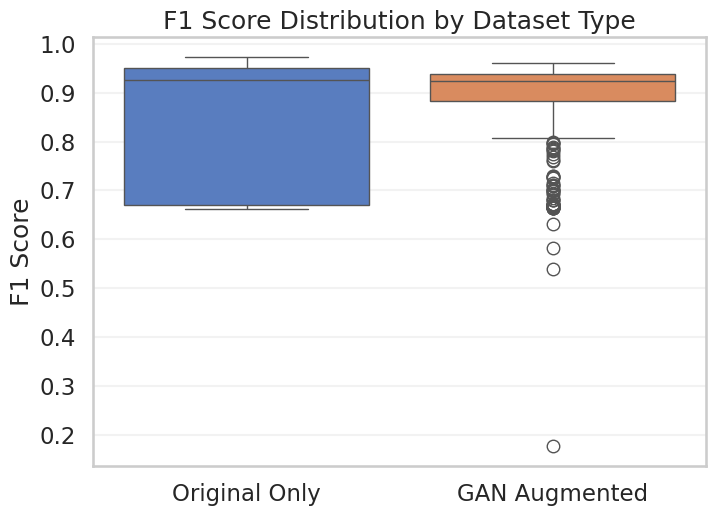

In [ ]:
# Ensure F1 Score exists (expand from dict column if needed)
if "F1 Score" not in df.columns and "test_scores" in df.columns:
    df = df.join(pd.json_normalize(df["test_scores"])[["F1 Score"]])

# Friendly labels
df_box = df.copy()
df_box["Dataset Type"] = df_box["gen_augment"].map({
    True: "GAN Augmented", False: "Original Only",
    "True": "GAN Augmented", "False": "Original Only"
})

# assumes df_box with columns: ["Dataset Type", "F1 Score"]
order = ["Original Only", "GAN Augmented"]  # control left→right order
muted = sns.color_palette("muted", 10)
palette = {
    "Original Only": muted[0],   # muted blue
    "GAN Augmented": muted[1],   # muted orange
}


sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(7.5, 5.5))
ax = sns.boxplot(
    data=df_box,
    x="Dataset Type",
    y="F1 Score",
    order=order,
    palette=palette,
    showfliers=True
)

ax.set_title("F1 Score Distribution by Dataset Type")
ax.set_xlabel("")
ax.set_ylabel("F1 Score")
#ax.set_ylim(0, 1)  # uncomment if you want [0,1]
ax.grid(True, axis="y", alpha=0.25)
plt.tight_layout()
plt.show()

### 10 ✅

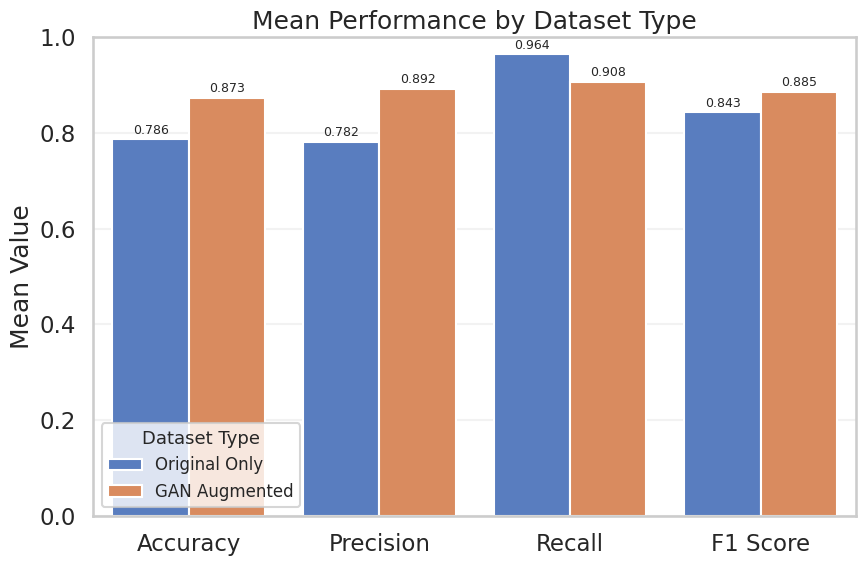

In [ ]:
# Ensure metrics exist (expand from test_scores if needed)
METRICS = ["Accuracy", "Precision", "Recall", "F1 Score"]
if not set(METRICS).issubset(df.columns) and "test_scores" in df.columns:
    df = df.join(pd.json_normalize(df["test_scores"])[METRICS])

# Friendly labels
plot_df = df.copy()
plot_df["Augmentation"] = plot_df["gen_augment"].map({
    True: "GAN Augmented", False: "Original Only",
    "True": "GAN Augmented", "False": "Original Only"
})

# Mean per augmentation
means = (plot_df.groupby("Augmentation")[METRICS]
         .mean()
         .reset_index()
         .melt(id_vars="Augmentation", var_name="Metric", value_name="Mean"))

# Colors: blue vs orange
muted = sns.color_palette("muted", 10)
palette = {
    "Original Only": muted[0],   # muted blue
    "GAN Augmented": muted[1],   # muted orange
}

sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(9, 6))
ax = sns.barplot(
    data=means,
    x="Metric", y="Mean",
    hue="Augmentation", hue_order=["Original Only", "GAN Augmented"],
    palette=palette
)

# Optional: value labels on bars
for cont in ax.containers:
    ax.bar_label(cont, fmt="%.3f", padding=2, fontsize=9)

ax.set_title("Mean Performance by Dataset Type")
ax.set_ylabel("Mean Value")
ax.set_xlabel("")
ax.set_ylim(0, 1)  # comment out if your metrics aren’t 0–1
ax.grid(True, axis="y", alpha=0.25)
plt.legend(title="Dataset Type", fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()


### 11

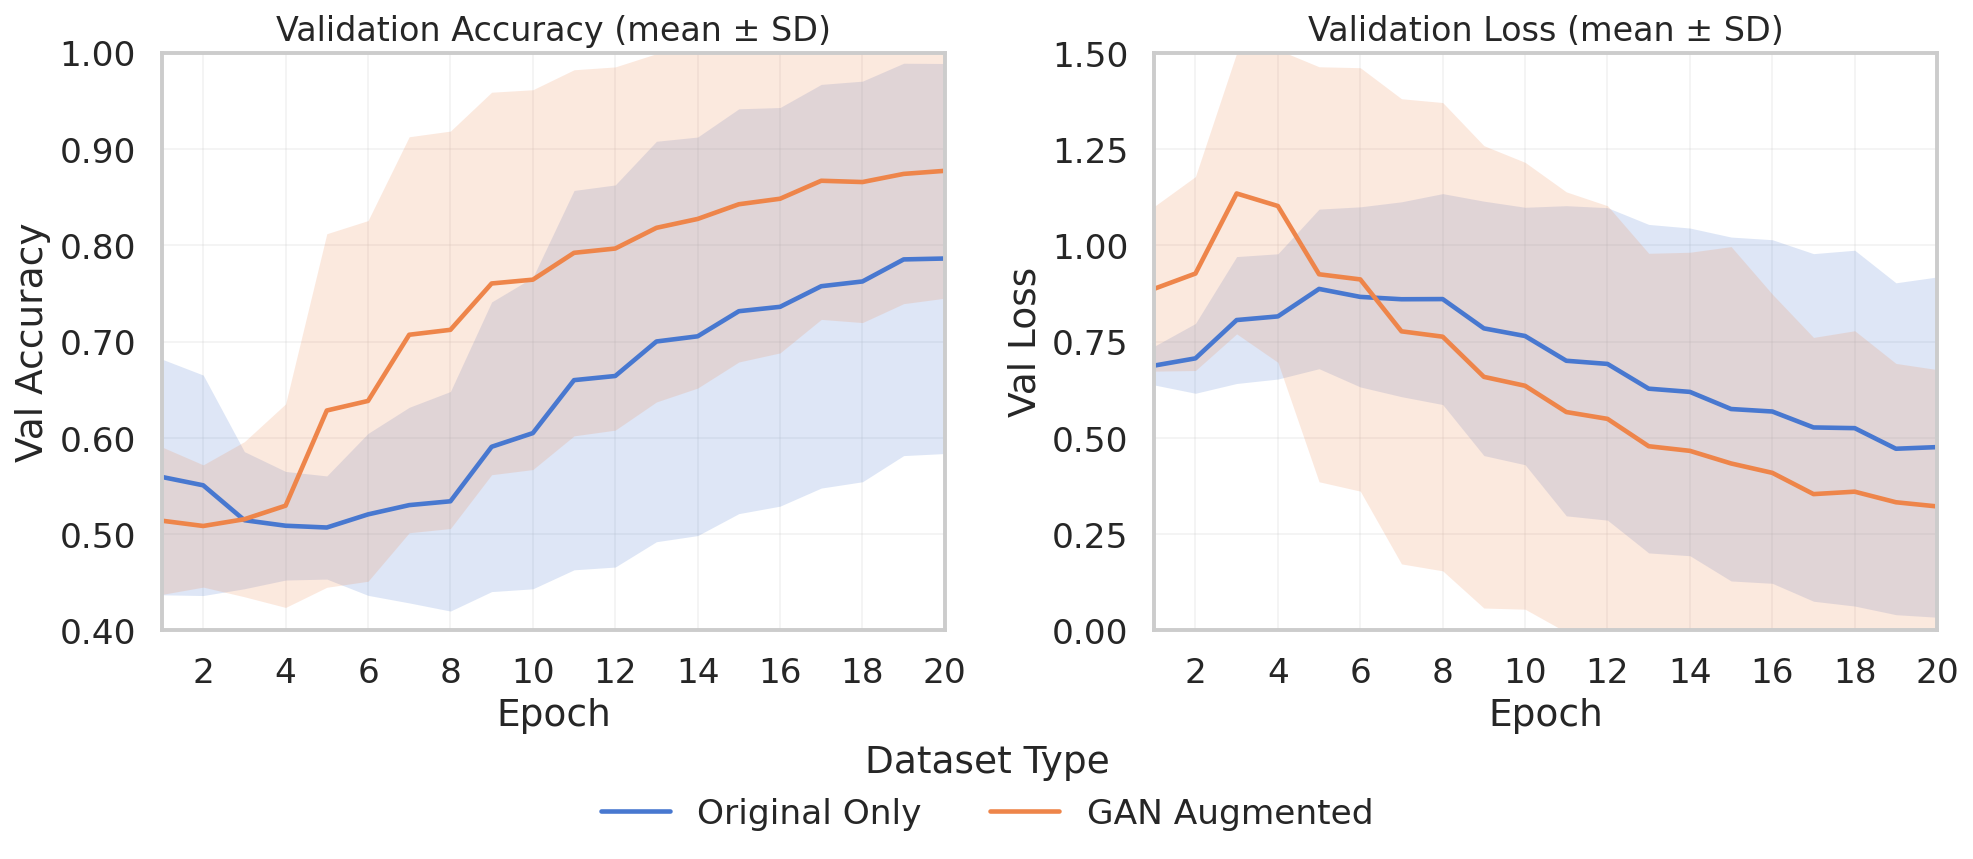

In [ ]:
# --------------------
# Validation History: mean ± SD (Original vs GAN)
# --------------------
sns.set(style="whitegrid", context="talk")

# --- helpers ---
def to_hist_dict(x):
    """Coerce a cell to a history dict (handles strings / None)."""
    if isinstance(x, dict):
        return x
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception:
            return {}
    return {}

def extract_metric(histories, key):
    """Stack a metric across runs into (n_runs, max_len) with NaNs for ragged tails."""
    max_len = 0
    seqs = []
    for h in histories:
        vals = h.get(key, [])
        seqs.append(vals)
        if len(vals) > max_len:
            max_len = len(vals)
    arr = np.full((len(seqs), max_len), np.nan, dtype=float)
    for i, vals in enumerate(seqs):
        if len(vals):
            arr[i, :len(vals)] = vals
    return arr

def plot_mean_band(ax, epochs, mean, std, color, label, y_label=None, title=None, as_percent=False):
    ax.plot(epochs, mean, color=color, linewidth=2.2, label=label)
    ax.fill_between(epochs, mean - std, mean + std, color=color, alpha=0.18, linewidth=0)
    if title: ax.set_title(title, fontsize=16)
    if y_label: ax.set_ylabel(y_label)
    ax.grid(True, alpha=0.25)
    ax.margins(x=0.02)
    if as_percent:
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# --- split groups (you already have these; keep for safety) ---
if 'gen_augment' in df.columns:
    original_only = df[df['gen_augment'] == False]
    gan_augmented = df[df['gen_augment'] == True]
else:
    raise ValueError("Column 'gen_augment' not found.")

# --- parse histories once per group ---
muted = sns.color_palette("muted", 10)
COLS = {"Original Only": muted[0], "GAN Augmented": muted[1]}

groups = [
    ("Original Only", original_only, COLS["Original Only"]),
    ("GAN Augmented", gan_augmented, COLS["GAN Augmented"]),
]

fig, axes = plt.subplots(1, 2, figsize=(13.5, 5.8), dpi=150, sharex=True)
ax_acc, ax_loss = axes

for label, gdf, color in groups:
    histories = gdf['history'].apply(to_hist_dict).tolist()

    # accuracy
    val_acc = extract_metric(histories, 'val_accuracy')
    mean_va = np.nanmean(val_acc, axis=0)
    std_va  = np.nanstd(val_acc, axis=0)
    epochs_a = np.arange(1, len(mean_va) + 1)

    # loss
    val_loss = extract_metric(histories, 'val_loss')
    mean_vl = np.nanmean(val_loss, axis=0)
    std_vl  = np.nanstd(val_loss, axis=0)
    epochs_l = np.arange(1, len(mean_vl) + 1)

    plot_mean_band(ax_acc,  epochs_a, mean_va, std_va, color, label,
                   y_label="Validation Accuracy", title="Validation Accuracy (mean ± SD)", as_percent=True)
    plot_mean_band(ax_loss, epochs_l, mean_vl, std_vl, color, label,
                   y_label="Validation Loss",     title="Validation Loss (mean ± SD)")

# compute global max epoch so both panels share x-range
global_max_epoch = 0
for line in ax_acc.lines + ax_loss.lines:
    if len(line.get_xdata()):
        global_max_epoch = max(global_max_epoch, int(np.nanmax(line.get_xdata())))

# --- X axis (Epoch) ---
for ax in (ax_acc, ax_loss):
    ax.set_xlim(1, global_max_epoch)
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.minorticks_on()

# --- Y axis: Validation Accuracy ---
ax_acc.set_ylim(0.40, 1.00)
ax_acc.yaxis.set_major_locator(MultipleLocator(0.10))
ax_acc.yaxis.set_minor_locator(MultipleLocator(0.05))
ax_acc.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# --- Y axis: Validation Loss ---
ax_loss.set_ylim(0.00, 1.50)
ax_loss.yaxis.set_major_locator(MultipleLocator(0.25))
ax_loss.yaxis.set_minor_locator(MultipleLocator(0.125))
ax_loss.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# labels
ax_acc.set_xlabel("Epoch"); ax_loss.set_xlabel("Epoch")
ax_acc.set_ylabel("Val Accuracy"); ax_loss.set_ylabel("Val Loss")

# grids: stronger for major, lighter for minor
# Replace your current grid block with this:
# After you finish setting tick locators/limits on ax_acc and ax_loss, add:

for ax in (ax_acc, ax_loss):
    ax.minorticks_on()                 # keep minor ticks if you want them visible
    ax.grid(False)                     # clear seaborn defaults
    ax.set_axisbelow(True)
    ax.grid(
        True, which="major", axis="both",
        linestyle="-", linewidth=0.8, alpha=0.25
    )



# legend below both plots
handles, labels = ax_acc.get_legend_handles_labels()
fig.legend(handles, labels, title="Dataset Type",
           loc="lower center", ncol=2, frameon=False, bbox_to_anchor=(0.5, -0.02))

plt.tight_layout(rect=(0, 0.08, 1, 1))  # leave room for legend
plt.show()


### 12 ✅

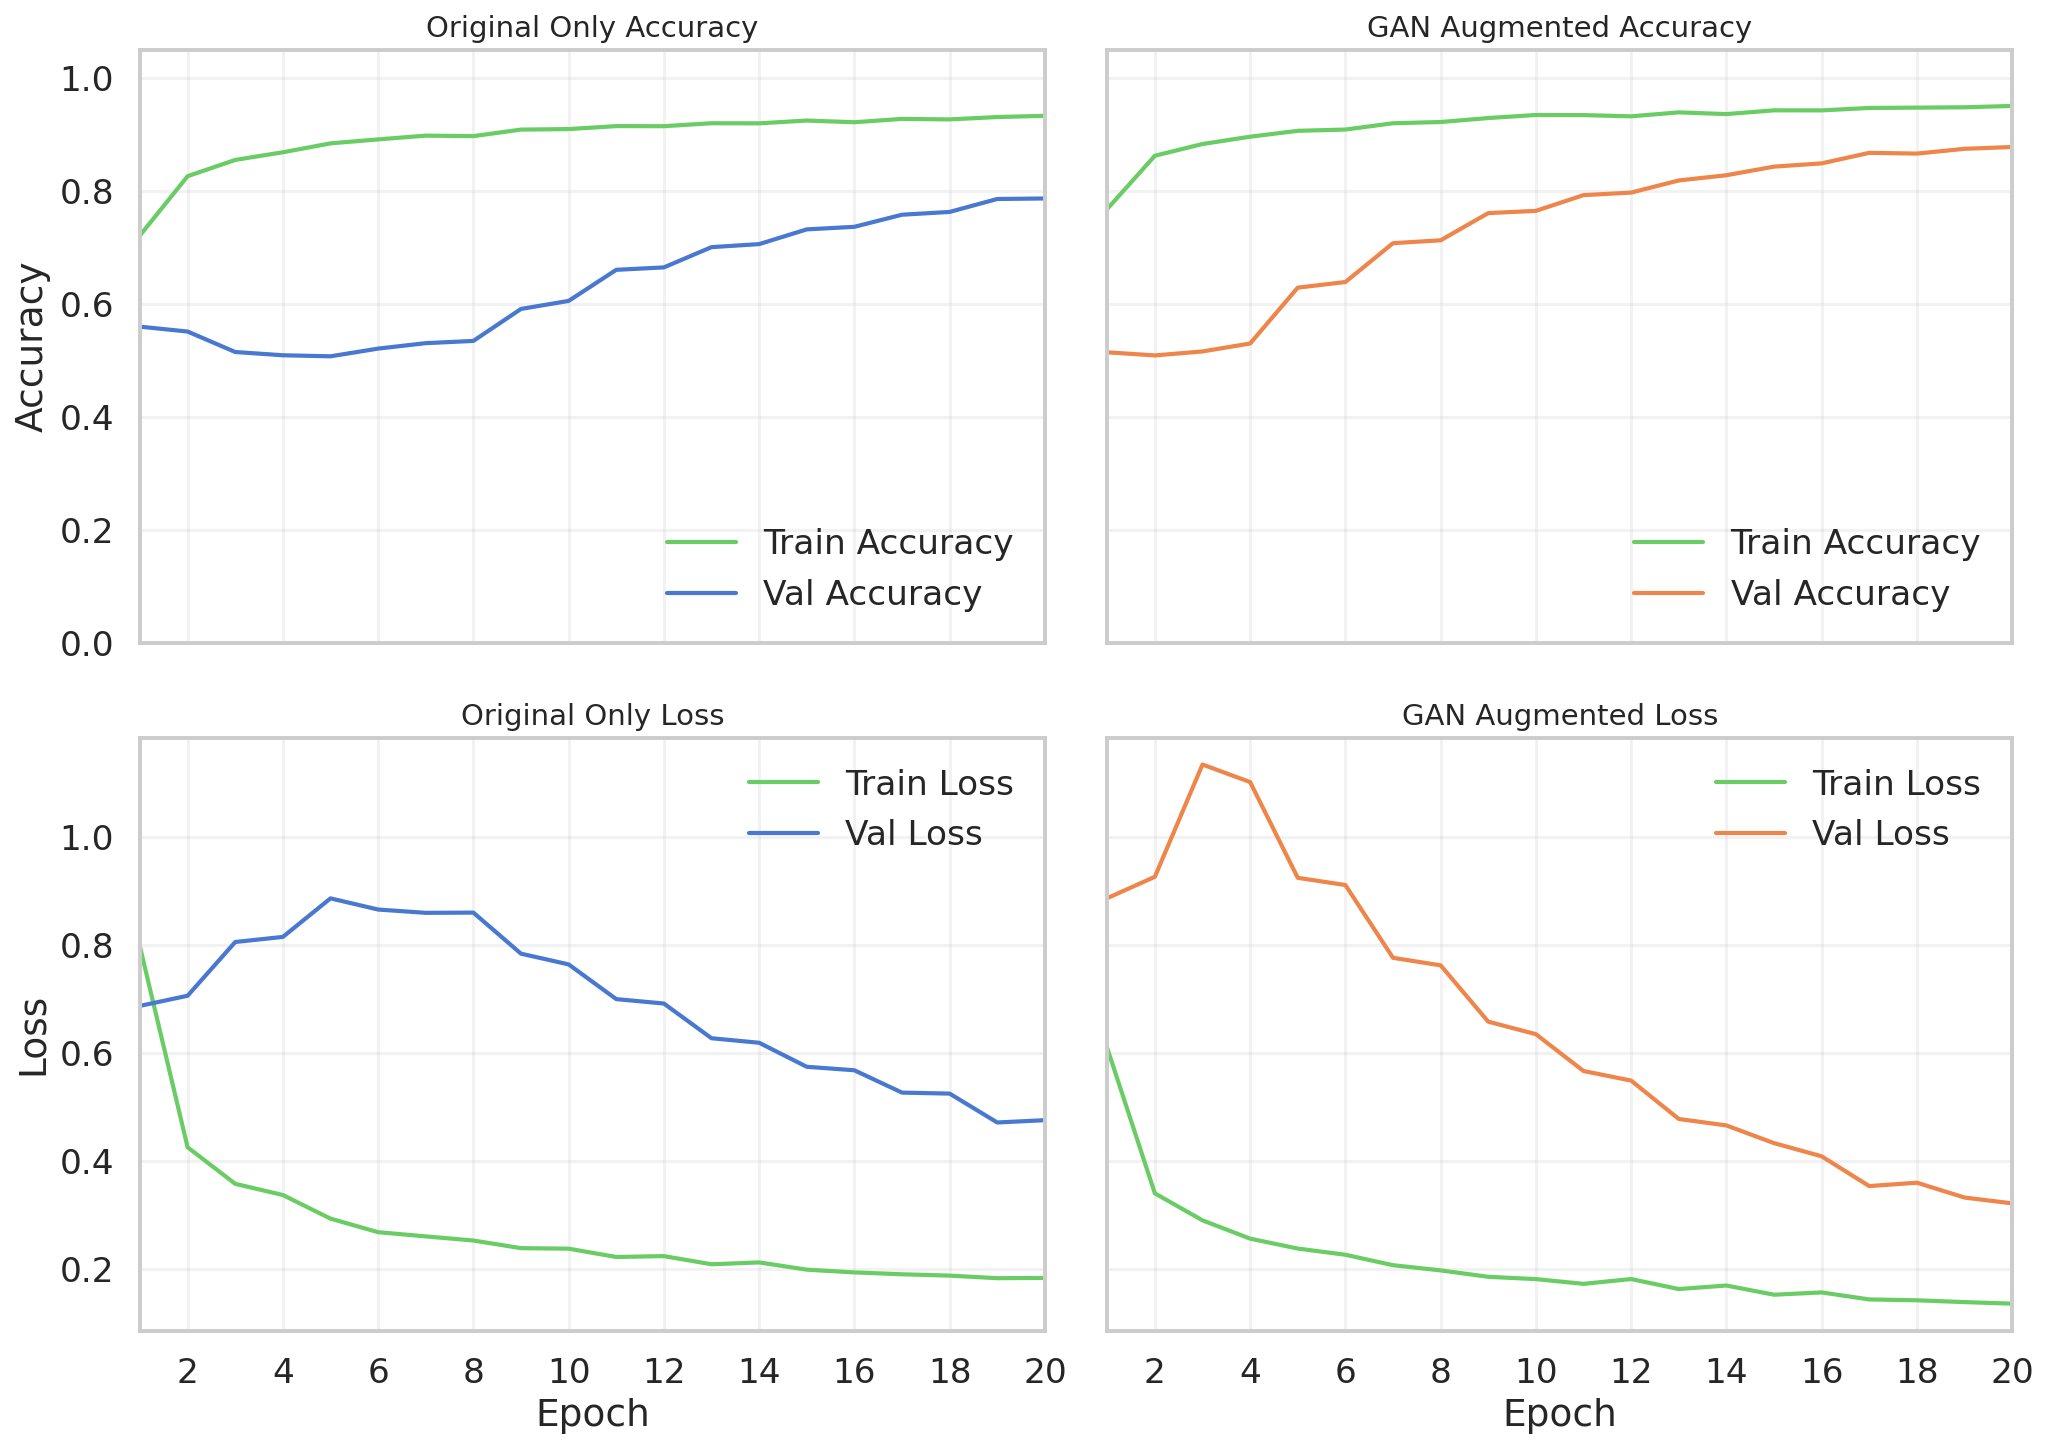

In [ ]:
# --------------------
# Combined 2x2 Grid: Train/Val Accuracy and Loss
# --------------------

# --- helpers ---
def to_hist_dict(x):
    if isinstance(x, dict):
        return x
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception:
            return {}
    return {}

def extract_metric(histories, key):
    max_len = max((len(h.get(key, [])) for h in histories), default=0)
    arr = np.full((len(histories), max_len), np.nan)
    for i, h in enumerate(histories):
        vals = h.get(key, [])
        arr[i, :len(vals)] = vals
    return arr

# --- colors from muted palette ---
muted = sns.color_palette("muted", 10)
color_train = muted[2]           # muted green for training curves
color_original = muted[0]        # muted blue
color_gan = muted[1]             # muted orange

# --- split groups ---
original_only = df[df['gen_augment'] == False]
gan_augmented = df[df['gen_augment'] == True]

groups = [
    ("Original Only", original_only, color_original),
    ("GAN Augmented", gan_augmented, color_gan),
]

# --- figure setup: 2x2 grid ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10), dpi=150, sharex='col', sharey='row')

global_max_epoch = 0  # track largest epoch number

for col, (label, gdf, color) in enumerate(groups):
    histories = gdf['history'].apply(to_hist_dict).tolist()

    # Accuracy
    train_acc = extract_metric(histories, 'accuracy')
    val_acc   = extract_metric(histories, 'val_accuracy')
    mean_train_acc = np.nanmean(train_acc, axis=0)
    mean_val_acc   = np.nanmean(val_acc, axis=0)
    epochs = np.arange(1, len(mean_train_acc) + 1)
    global_max_epoch = max(global_max_epoch, len(mean_train_acc))

    ax_acc = axes[0, col]
    ax_acc.plot(epochs, mean_train_acc, color=color_train, lw=2, label="Train Accuracy")
    ax_acc.plot(epochs, mean_val_acc, color=color, lw=2, label="Val Accuracy")
    ax_acc.set_title(f"{label} Accuracy", fontsize=14)
    ax_acc.grid(True, alpha=0.25)
    ax_acc.legend(loc="lower right", frameon=False)
    ax_acc.set_ylim(0, 1.05)

    # Loss
    train_loss = extract_metric(histories, 'loss')
    val_loss   = extract_metric(histories, 'val_loss')
    mean_train_loss = np.nanmean(train_loss, axis=0)
    mean_val_loss   = np.nanmean(val_loss, axis=0)

    ax_loss = axes[1, col]
    ax_loss.plot(epochs, mean_train_loss, color=color_train, lw=2, label="Train Loss")
    ax_loss.plot(epochs, mean_val_loss, color=color, lw=2, label="Val Loss")
    ax_loss.set_title(f"{label} Loss", fontsize=14)
    ax_loss.grid(True, alpha=0.25)
    ax_loss.legend(loc="upper right", frameon=False)

# X/Y labels
for ax in axes[1, :]:
    ax.set_xlabel("Epoch")
for ax in axes[:, 0]:
    ax.set_ylabel("Accuracy" if ax is axes[0, 0] else "Loss")

# Axis formatting: ticks and no x-padding
for ax in axes.flat:
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xlim(1, global_max_epoch)  # no horizontal padding
    ax.margins(x=0)                   # remove extra space

plt.tight_layout()
plt.show()


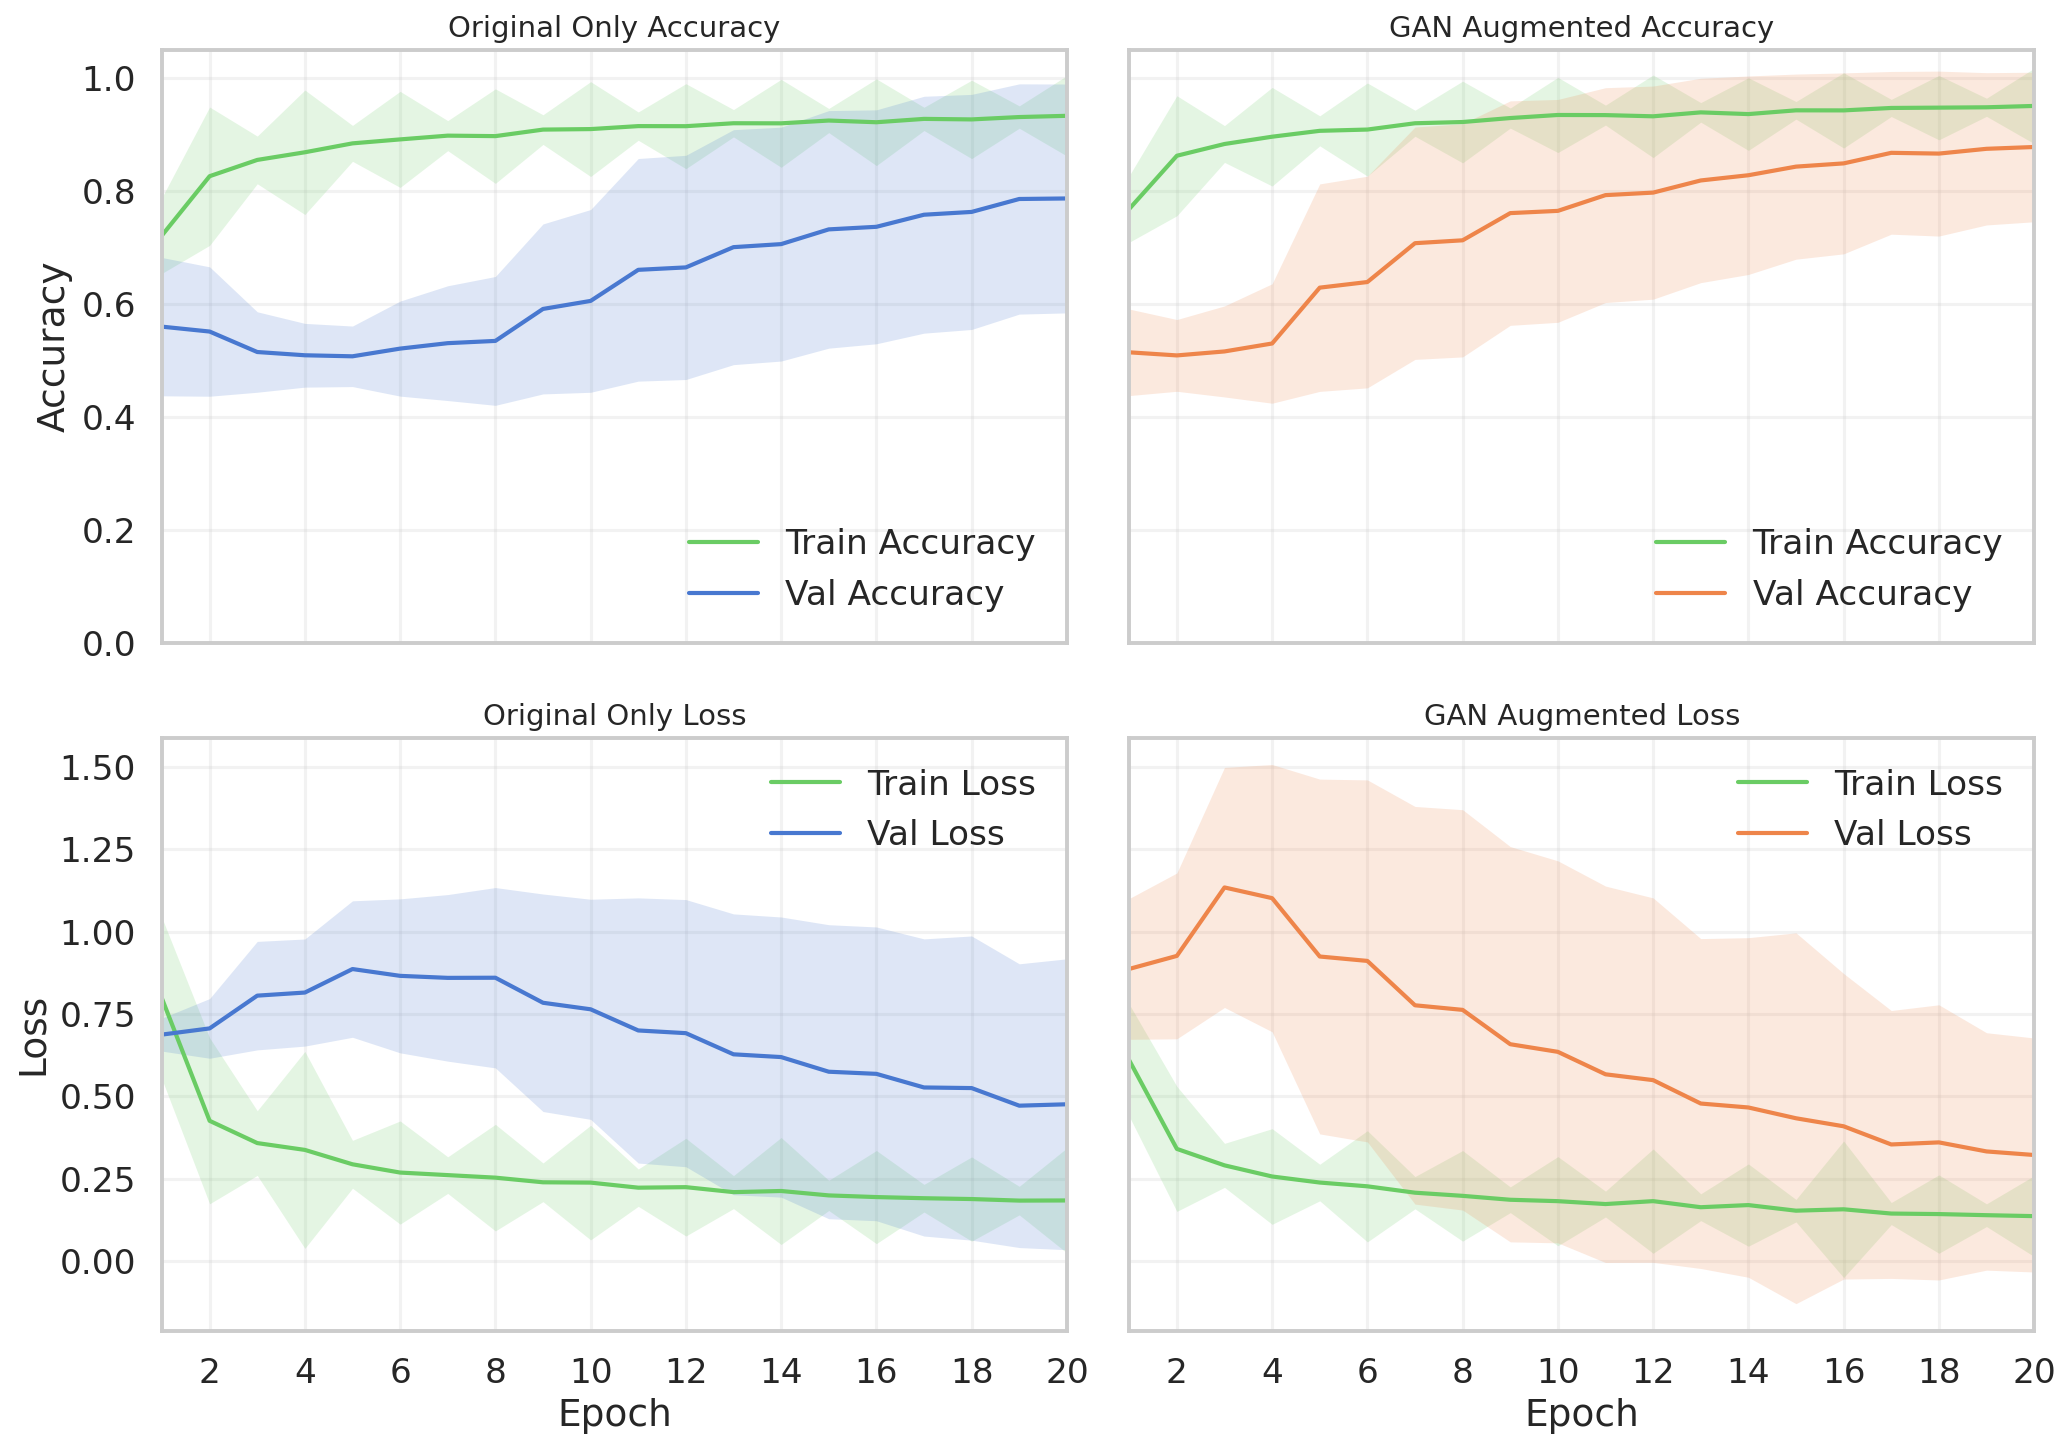

In [ ]:
# --------------------
# Combined 2x2 Grid: Train/Val Accuracy and Loss  (mean ± SD bands, muted colors, no x padding)
# --------------------
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

# --- helpers ---
def to_hist_dict(x):
    if isinstance(x, dict):
        return x
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception:
            return {}
    return {}

def extract_metric(histories, key):
    max_len = max((len(h.get(key, [])) for h in histories), default=0)
    arr = np.full((len(histories), max_len), np.nan)
    for i, h in enumerate(histories):
        vals = h.get(key, [])
        arr[i, :len(vals)] = vals
    return arr

def plot_mean_band(ax, epochs, mean, std, color, label):
    ax.plot(epochs, mean, color=color, lw=2, label=label)
    ax.fill_between(epochs, mean - std, mean + std, color=color, alpha=0.18, linewidth=0)

# --- colors from muted palette ---
muted = sns.color_palette("muted", 10)
color_train = muted[2]    # muted green for training curves
color_original = muted[0] # muted blue
color_gan = muted[1]      # muted orange

# --- split groups ---
original_only = df[df['gen_augment'] == False]
gan_augmented = df[df['gen_augment'] == True]

groups = [
    ("Original Only", original_only, color_original),
    ("GAN Augmented", gan_augmented, color_gan),
]

# --- figure setup: 2x2 grid ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10), dpi=150, sharex='col', sharey='row')

global_max_epoch = 0  # track largest epoch number

for col, (label, gdf, color_val) in enumerate(groups):
    histories = gdf['history'].apply(to_hist_dict).tolist()

    # ---------- Accuracy ----------
    train_acc_arr = extract_metric(histories, 'accuracy')
    val_acc_arr   = extract_metric(histories, 'val_accuracy')

    mean_train_acc = np.nanmean(train_acc_arr, axis=0)
    std_train_acc  = np.nanstd(train_acc_arr, axis=0)
    mean_val_acc   = np.nanmean(val_acc_arr, axis=0)
    std_val_acc    = np.nanstd(val_acc_arr, axis=0)

    epochs = np.arange(1, len(mean_train_acc) + 1)
    global_max_epoch = max(global_max_epoch, len(mean_train_acc))

    ax_acc = axes[0, col]
    plot_mean_band(ax_acc, epochs, mean_train_acc, std_train_acc, color_train, "Train Accuracy")
    plot_mean_band(ax_acc, epochs, mean_val_acc,   std_val_acc,   color_val,   "Val Accuracy")

    ax_acc.set_title(f"{label} Accuracy", fontsize=14)
    ax_acc.grid(True, alpha=0.25)
    ax_acc.legend(loc="lower right", frameon=False)
    ax_acc.set_ylim(0, 1.05)

    # ---------- Loss ----------
    train_loss_arr = extract_metric(histories, 'loss')
    val_loss_arr   = extract_metric(histories, 'val_loss')

    mean_train_loss = np.nanmean(train_loss_arr, axis=0)
    std_train_loss  = np.nanstd(train_loss_arr, axis=0)
    mean_val_loss   = np.nanmean(val_loss_arr, axis=0)
    std_val_loss    = np.nanstd(val_loss_arr, axis=0)

    ax_loss = axes[1, col]
    plot_mean_band(ax_loss, epochs, mean_train_loss, std_train_loss, color_train, "Train Loss")
    plot_mean_band(ax_loss, epochs, mean_val_loss,   std_val_loss,   color_val,   "Val Loss")

    ax_loss.set_title(f"{label} Loss", fontsize=14)
    ax_loss.grid(True, alpha=0.25)
    ax_loss.legend(loc="upper right", frameon=False)

# X/Y labels
for ax in axes[1, :]:
    ax.set_xlabel("Epoch")
axes[0, 0].set_ylabel("Accuracy")
axes[1, 0].set_ylabel("Loss")

# Axis formatting: ticks and no x-padding
for ax in axes.flat:
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xlim(1, global_max_epoch)  # no horizontal padding
    ax.margins(x=0)                   # remove extra space

plt.tight_layout()
plt.show()
